# 1. Setup and Load data


### Key terms:
#### pip: 
#### directory:
#### 


## 1.1 Setup environment and Install Dependencies

In [65]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
altair                       4.2.2
altgraph                     0.17.4
astor                        0.8.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
backports.zoneinfo           0.2.1
base58                       2.1.1
bash                         0.6
bleach                       6.0.0
blinker                      1.6.2
cachetools                   4.2.4
certifi                      2023.7.22
chardet                      4.0.0
charset-normalizer           3.2.0
click                        7.1.2
colorama                     0.4.6
cycler                       0.11.0
debugpy                      1.7.0
decorator                    5.1.1
distlib                      0.3.8
entrypoints                  0.4
filelock                     3.12.2
flatbuffers                  1.12
fonttools                    4.38.0
gast    


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import tensorflow as tf
import os

In [68]:
gpus = tf.config.experimental.list_physical_devices('gpu')
gpus

[]

In [69]:
gpus = tf.config.experimental.list_physical_devices('GPU')

# for each gpu in gpus, restrict memory growth so it doesn't use up all the memory available
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Get images from kaggle

In [70]:
import opendatasetas od

SyntaxError: invalid syntax (2302955518.py, line 1)

In [ ]:
od.download("https://www.kaggle.com/datasets/alirezaatashnejad/sad-and-happy-face-detection")

## 1.3 Delete irrelevant images

In [ ]:
# The folder is dataset

data_dir = 'sad-and-happy-face-detection/data'


In [ ]:
# A list of extensions we want and don't want to remove
image_exts = ['jpeg' , 'jpg' ,'bmp' , 'png']


In [ ]:
# To check some files in the dataset we can use os.listdir('name of directory')

os.listdir('sad-and-happy-face-detection/data')
os.listdir('sad-and-happy-face-detection/data/happy')


In [ ]:
# Go through each image class, happy and sad
# then go through each image in the class
# get the image path using os.path.join
# check if the extension is within the allowed extension
# if it is, leave it
# else, delete it using os.remove

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


## 1.3 Load Data


In [ ]:
# Get the details of the images in the dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir)


In [ ]:
# To see the data, we need to load it into memory as an iterator
# Consider an iterator as a sample from a large population 
# To access this sample, you would load it into memory and use it using the inbuilt method .as_numpy_iterator()
data_iterator = data.as_numpy_iterator()



In [ ]:
# .next() creates a group pf 32 images in the sample to show as even the sample can be quite big 
batch = data_iterator.next()
len(batch)

In [ ]:
# Here you'll see that batch has the length of 2. This means that there are 2 lists in batch. 
# The second part of batch, batch[1] shows which of the images are happy or sad by either a 0 or 1
# 0 represents happy, 1 represents sad

# Now, the first part of batch, batch[0] shows the image details.
# All 32 images in the batch are going to have a 2D array consisting of 256 pixels each or 66536 pixels in total.
# Each pixel consists of a combination of rgb values 
# rgb values are 3 values between 0 and 255 where there are 255*255*255 combinations of different colours that can be formed.
# Hence this describes the shape of each batch
# (32, 256, 256, 3)

# Each batch consists of 32 images.
# Each images has 256 by 256 pixels so 256 x-axis pixels and 256 y-axis pixels
# Each pixel has 3 colors between 0 and 255

# For example, to find the image details of the second image, we will do this:
# batch[0] will give image details
# batch[0][22] will give image number 22
# batch[0][22][150][45] will give the rgb value at x-axis pixel 150 and y-axis pixel 45
batch[0][1][150][45]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8,8))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# 2. Preprocess Data



## 2.1 Scaling the data

In [71]:
# To optimize the deep learning model training, it's better to have values as small as possible.
# Therefore, we will divide the colour values by 255 to make them between 0 and 1
# Now, all the rgb values are between 0 and 1.

# Lambda funtions allows us to apply a transformation on the variable itself 
# by passing the values as parameters which in our case is x-axis pixel and y-axis pixel
data = data.map(lambda x,y: (x/255,y))

### https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map

In [72]:
# Now you can see the values are between 0 and 1

data.as_numpy_iterator().next()

(array([[[[1.55324873e-03, 1.49173394e-03, 1.44559785e-03],
          [1.55357539e-03, 1.49206060e-03, 1.44592451e-03],
          [1.55807100e-03, 1.49655621e-03, 1.45042012e-03],
          ...,
          [1.58457691e-03, 1.52306200e-03, 1.47692591e-03],
          [1.58457691e-03, 1.52306200e-03, 1.47692591e-03],
          [1.58457691e-03, 1.52306200e-03, 1.47692591e-03]],
 
         [[1.55496085e-03, 1.49344606e-03, 1.44730997e-03],
          [1.56278175e-03, 1.50126696e-03, 1.45513087e-03],
          [1.56862743e-03, 1.50711264e-03, 1.46097655e-03],
          ...,
          [1.59938482e-03, 1.53787003e-03, 1.49173394e-03],
          [1.59938482e-03, 1.53787003e-03, 1.49173394e-03],
          [1.59938482e-03, 1.53787003e-03, 1.49173394e-03]],
 
         [[1.56862743e-03, 1.50711264e-03, 1.46097655e-03],
          [1.56862743e-03, 1.50711264e-03, 1.46097655e-03],
          [1.56944664e-03, 1.50793185e-03, 1.46179576e-03],
          ...,
          [1.59938482e-03, 1.53787003e-03, 1.4917

## 2.2 Splitting the data into training, testing, validation


In [73]:
len(data)

# Total batches

63

In [74]:
# Now comes the part where we actually start implementing the Machine Learning model
# Here we have to split the data into 3 parts for 3 different purposes:

# 1. Testing data: the training set is used to train the model;
# 2. Validation data: the validation set is used to track model parameters and *avoid overfitting*; 
# 3. Testing data: the testing set is used for checking the model’s performance on *new data*.

# The percentage of splitting is usually 70:20:10

train_size = int(len(data)*.7) 
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [75]:
# Assign the actual image batches to each split

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# 3. Model

## 3.1 Build Neural Network


In [76]:
# import necessary libraries to build a neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout

In [77]:
# Create the model
model = Sequential()


In [78]:
# Add several layers to it

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [79]:
# Compile the model
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [80]:
# Show the summary of the model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## 3.2 Train the neural network


In [81]:
# Train the model 
hist = model.fit(train,epochs=30,validation_data=val)

Epoch 1/30
44/44 [==============================] - 41s 903ms/step - loss: 0.6945 - accuracy: 0.5376 - val_loss: 0.6910 - val_accuracy: 0.5365
Epoch 2/30
44/44 [==============================] - 41s 912ms/step - loss: 0.6908 - accuracy: 0.5362 - val_loss: 0.6886 - val_accuracy: 0.5521
Epoch 3/30
44/44 [==============================] - 38s 851ms/step - loss: 0.6900 - accuracy: 0.5412 - val_loss: 0.6897 - val_accuracy: 0.5417
Epoch 4/30
44/44 [==============================] - 38s 848ms/step - loss: 0.6907 - accuracy: 0.5362 - val_loss: 0.6854 - val_accuracy: 0.5729
Epoch 5/30
44/44 [==============================] - 39s 855ms/step - loss: 0.6910 - accuracy: 0.5341 - val_loss: 0.6893 - val_accuracy: 0.5469
Epoch 6/30
44/44 [==============================] - 38s 850ms/step - loss: 0.6910 - accuracy: 0.5341 - val_loss: 0.6880 - val_accuracy: 0.5573
Epoch 7/30
44/44 [==============================] - 41s 916ms/step - loss: 0.6915 - accuracy: 0.5341 - val_loss: 0.6937 - val_accuracy: 0.5104

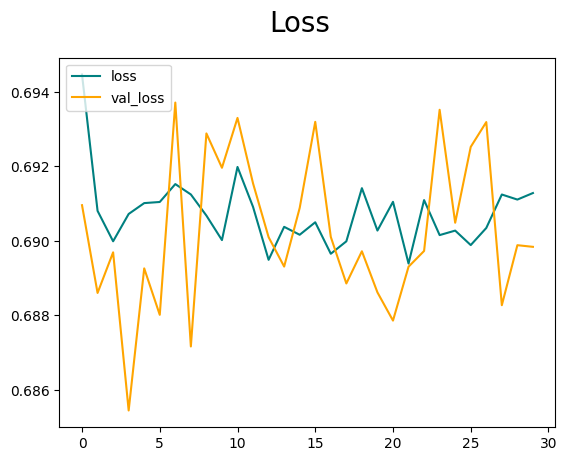

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

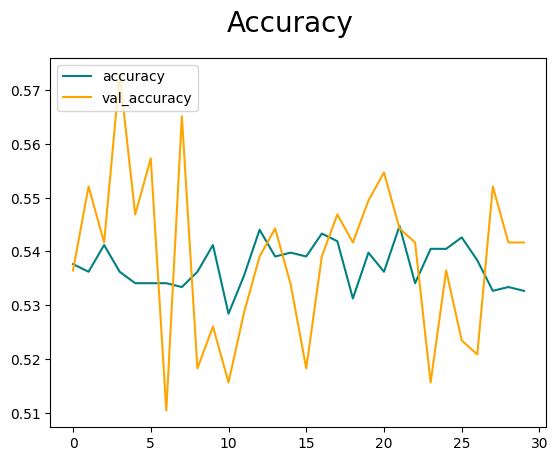

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate the Model

## 4.1 Evaluate

In [31]:
# Here we will import 3 metrics to measure the reliability of the model.
# Think of this as a test run after you have studied intensively for an exam. 
# To test your skills you would attempt a past paper and look at certain metrics, right? 
# Like how much time it took you, which topics you struggled with, etc.

# These 3 metrics are typically used for classification problems

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
# Establish instances of the 3 metrics

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [33]:
# Now comes the testing part
# Remember we split into 3 parts? 
# The testing part is now used to check how reliable our model is on entirely new data that it has never seen before.

for batch in test.as_numpy_iterator():
    X, y = batch # True output value
    yhat = model.predict(X) # output from the model
    
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 173ms/step


In [34]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.7543859481811523, Recall:0.78899085521698, Accuracy:0.734375


In [35]:
import cv2
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

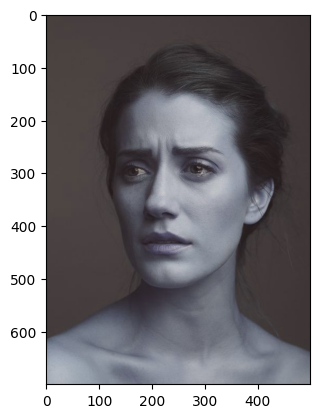

In [36]:
img = cv2.imread('dataset/666.jpg')
plt.imshow(img)
plt.show

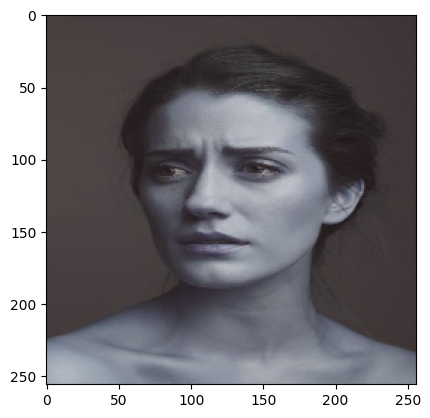

In [37]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
# Currently if we see the shape of resize, it is:

resize.shape

# which means it is a single image

TensorShape([256, 256, 3])

In [39]:
# Our model expects us to pass a batch of images rather than a single image.
# Hence, we need to add another dimension in the 0th index as that index determined which image it was

np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [40]:
expanded_resize = np.expand_dims(resize/255, 0)
yhat = model.predict(expanded_resize)


1/1 [==============================] - 0s 86ms/step


In [41]:
yhat

array([[0.64655346]], dtype=float32)

In [42]:
# As this is a binary classification problem, 
# there are only 2 outcomes

if yhat > 0.5:
    print('This is a sad face.')
else: 
    print('This is a happy face.')

This is a sad face.


# 5. Saving the model


## 5.1 Save


In [43]:
model.save(os.path.join('models','crashcourse_sentiment_classifier.h5'))

## 5.2 Load (optional)


In [44]:
from tensorflow.keras.models import load_model

In [45]:
new_model = load_model(os.path.join('models','crashcourse_sentiment_classifier.h5'))